# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import joblib
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aldofernandos","key":"0a9ea8d7ce192cbbd8c736a8dd0d05d4"}'}

In [3]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rakeshkapilavai/extrovert-vs-introvert-behavior-data --force
!unzip extrovert-vs-introvert-behavior-data.zip

Dataset URL: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
License(s): CC-BY-SA-4.0
  0% 0.00/15.0k [00:00<?, ?B/s]
100% 15.0k/15.0k [00:00<00:00, 79.5MB/s]
Archive:  extrovert-vs-introvert-behavior-data.zip
  inflating: personality_dataset.csv  


In [4]:
df = pd.read_csv('/content/personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
df.isna().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
duplicated_rows = df[numeric_columns].duplicated().sum()
duplicated_rows

np.int64(483)

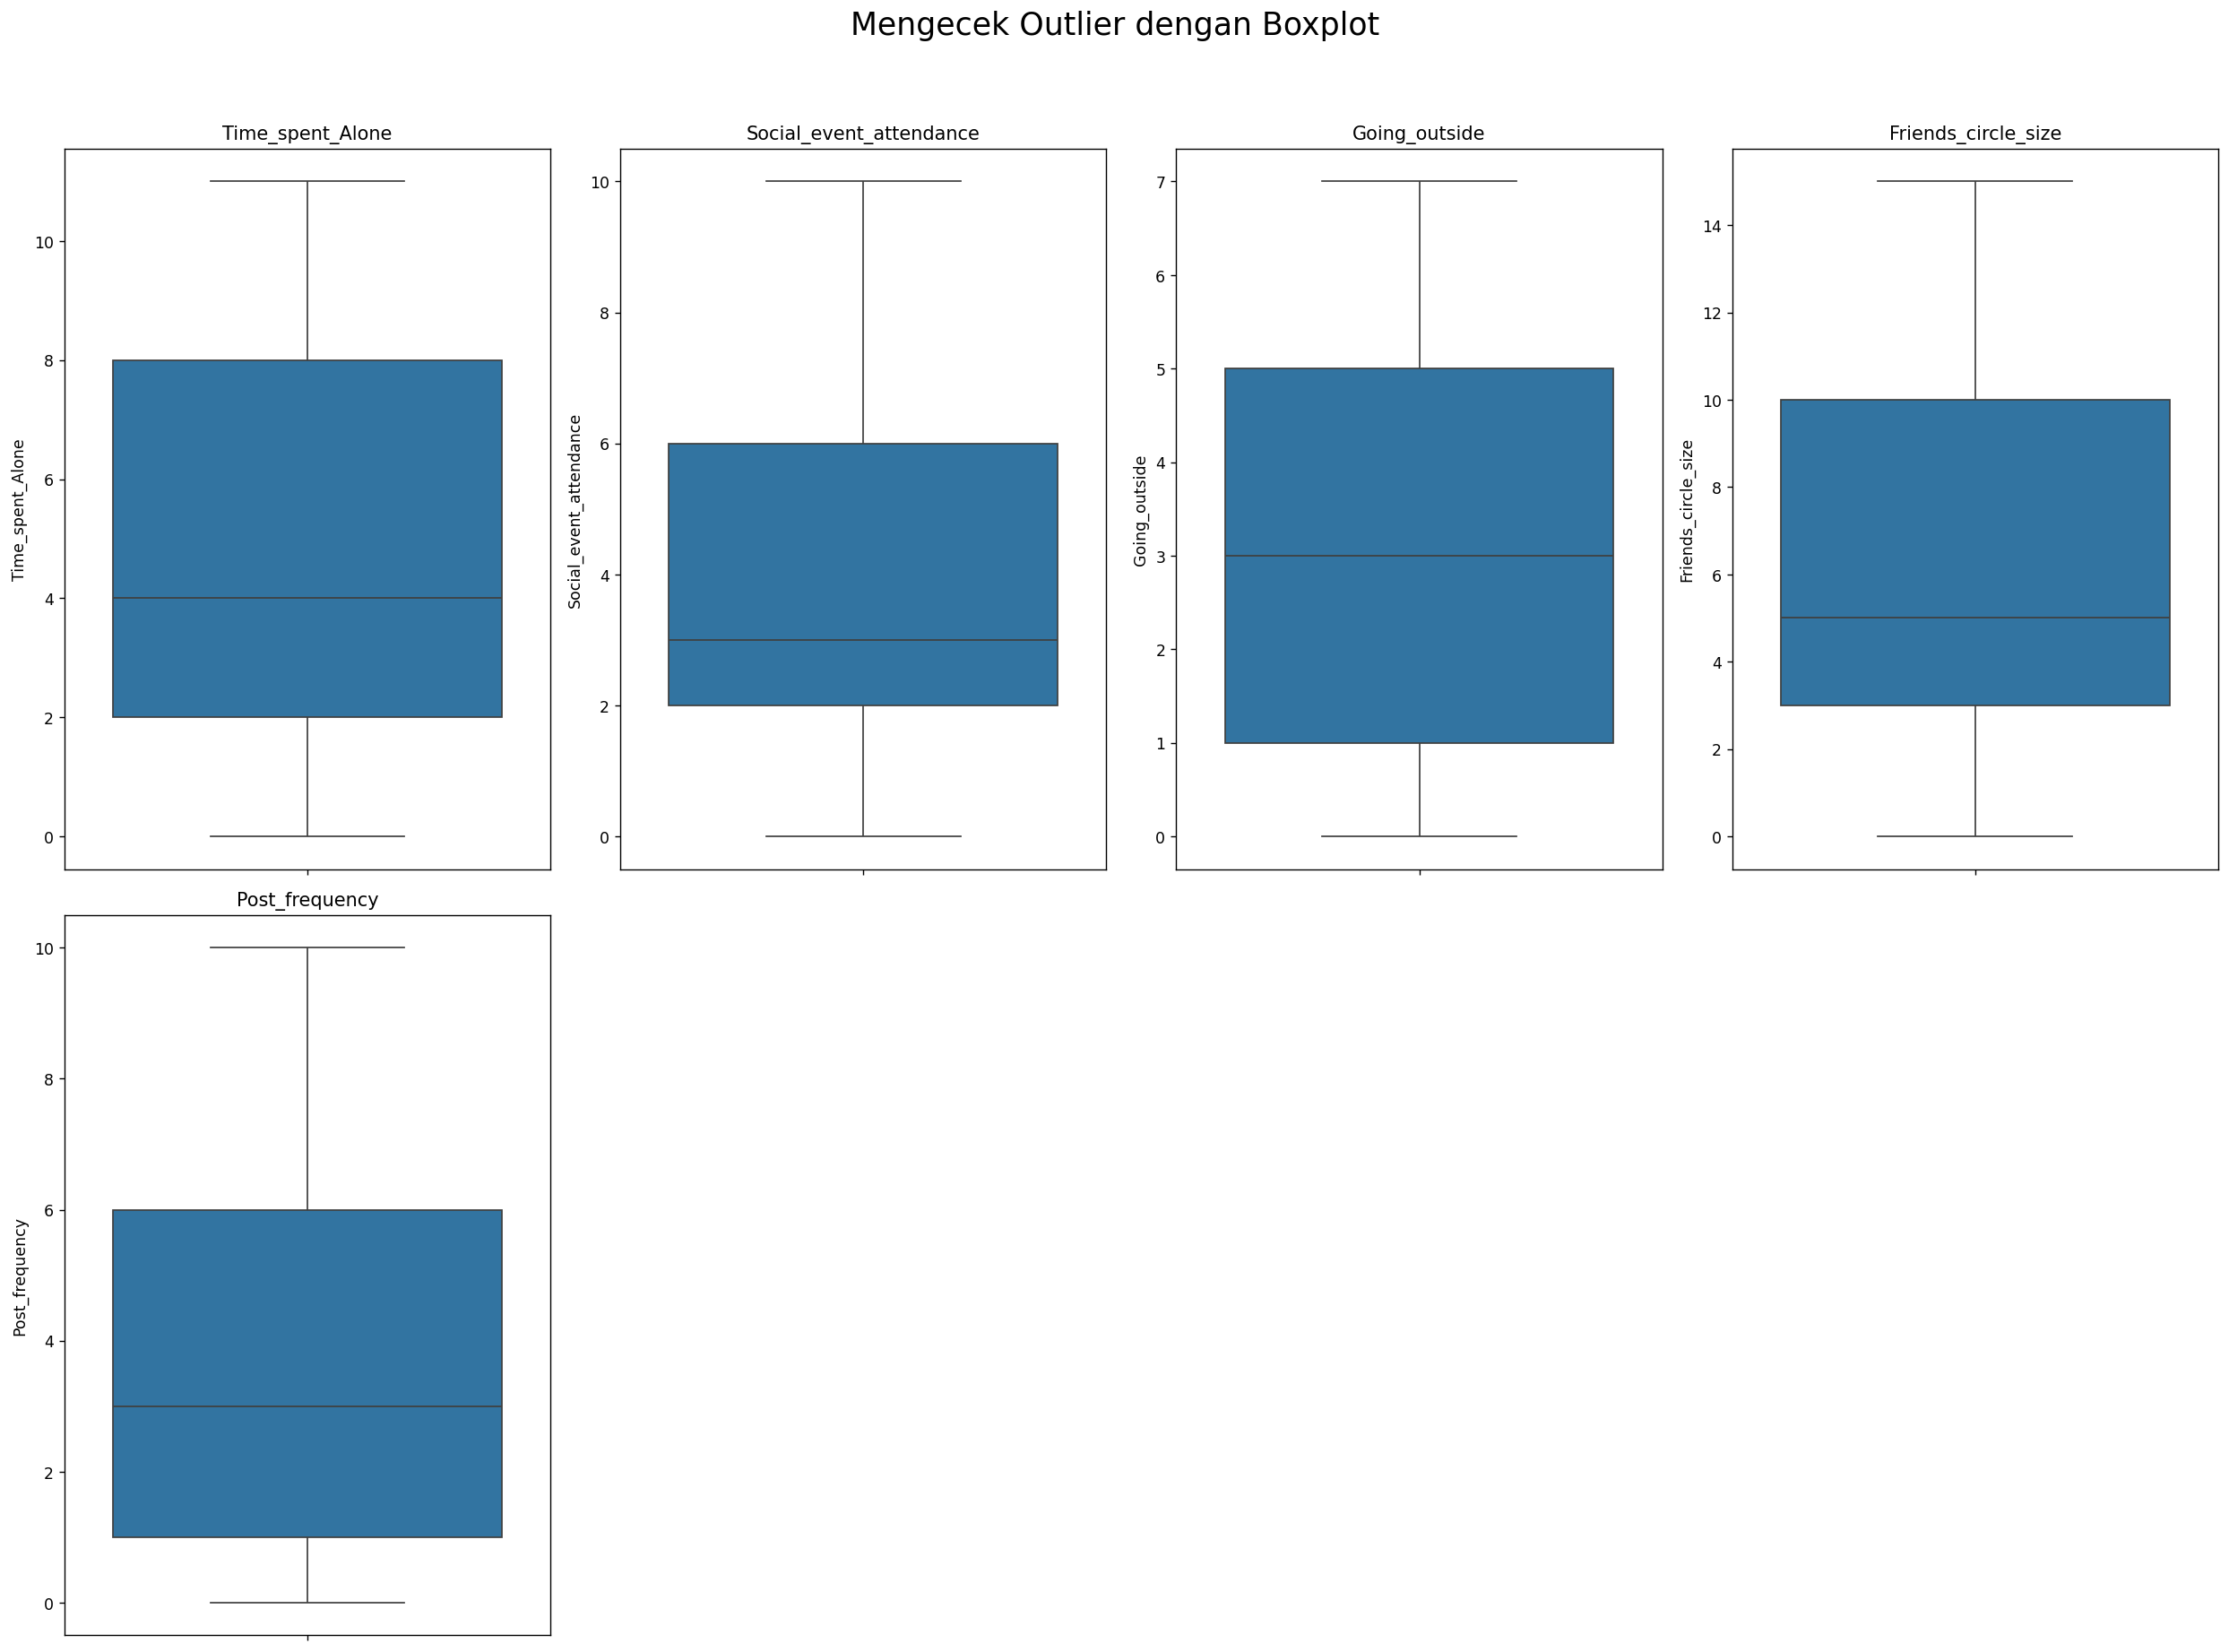

In [9]:
max_col = 4
max_row = math.ceil(len(df[numeric_columns].columns)/max_col)

## 2. Membuat plotnya
plt.figure(figsize=(20,15), dpi=125)
for i, col in enumerate(df[numeric_columns].columns):
  plt.subplot(max_row, max_col, i+1)
  sns.boxplot(df[numeric_columns][col])
  plt.title(col)

plt.suptitle('Mengecek Outlier dengan Boxplot', size=20)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

In [10]:
df['Personality'].value_counts()

,count
Personality,
Extrovert,1491
Introvert,1409


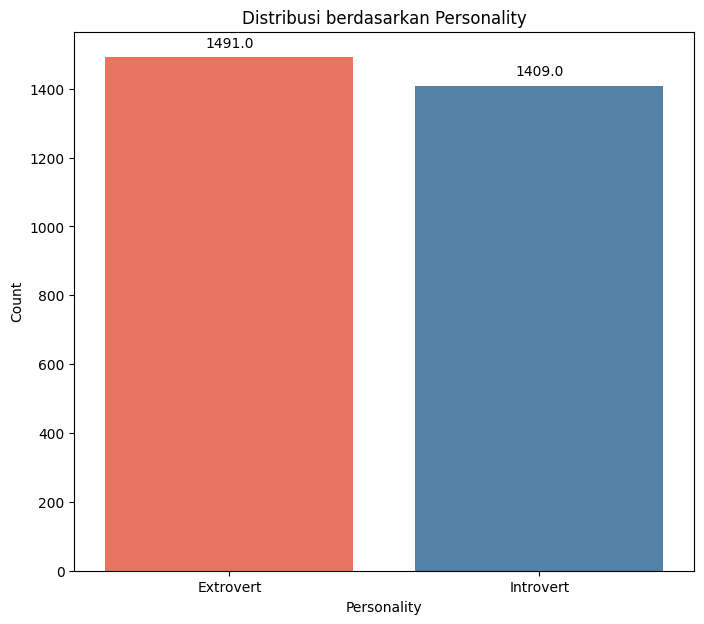

In [11]:
# Visualisasi Distribusi Target dengan Hue
plt.figure(figsize=(8, 7))
ax = sns.countplot(data=df, x='Personality', hue='Personality', palette=["#FF6347", "#4682B4"])
plt.title("Distribusi berdasarkan Personality")
plt.xlabel("Personality")
plt.ylabel("Count")

# Menambahkan angka di atas bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

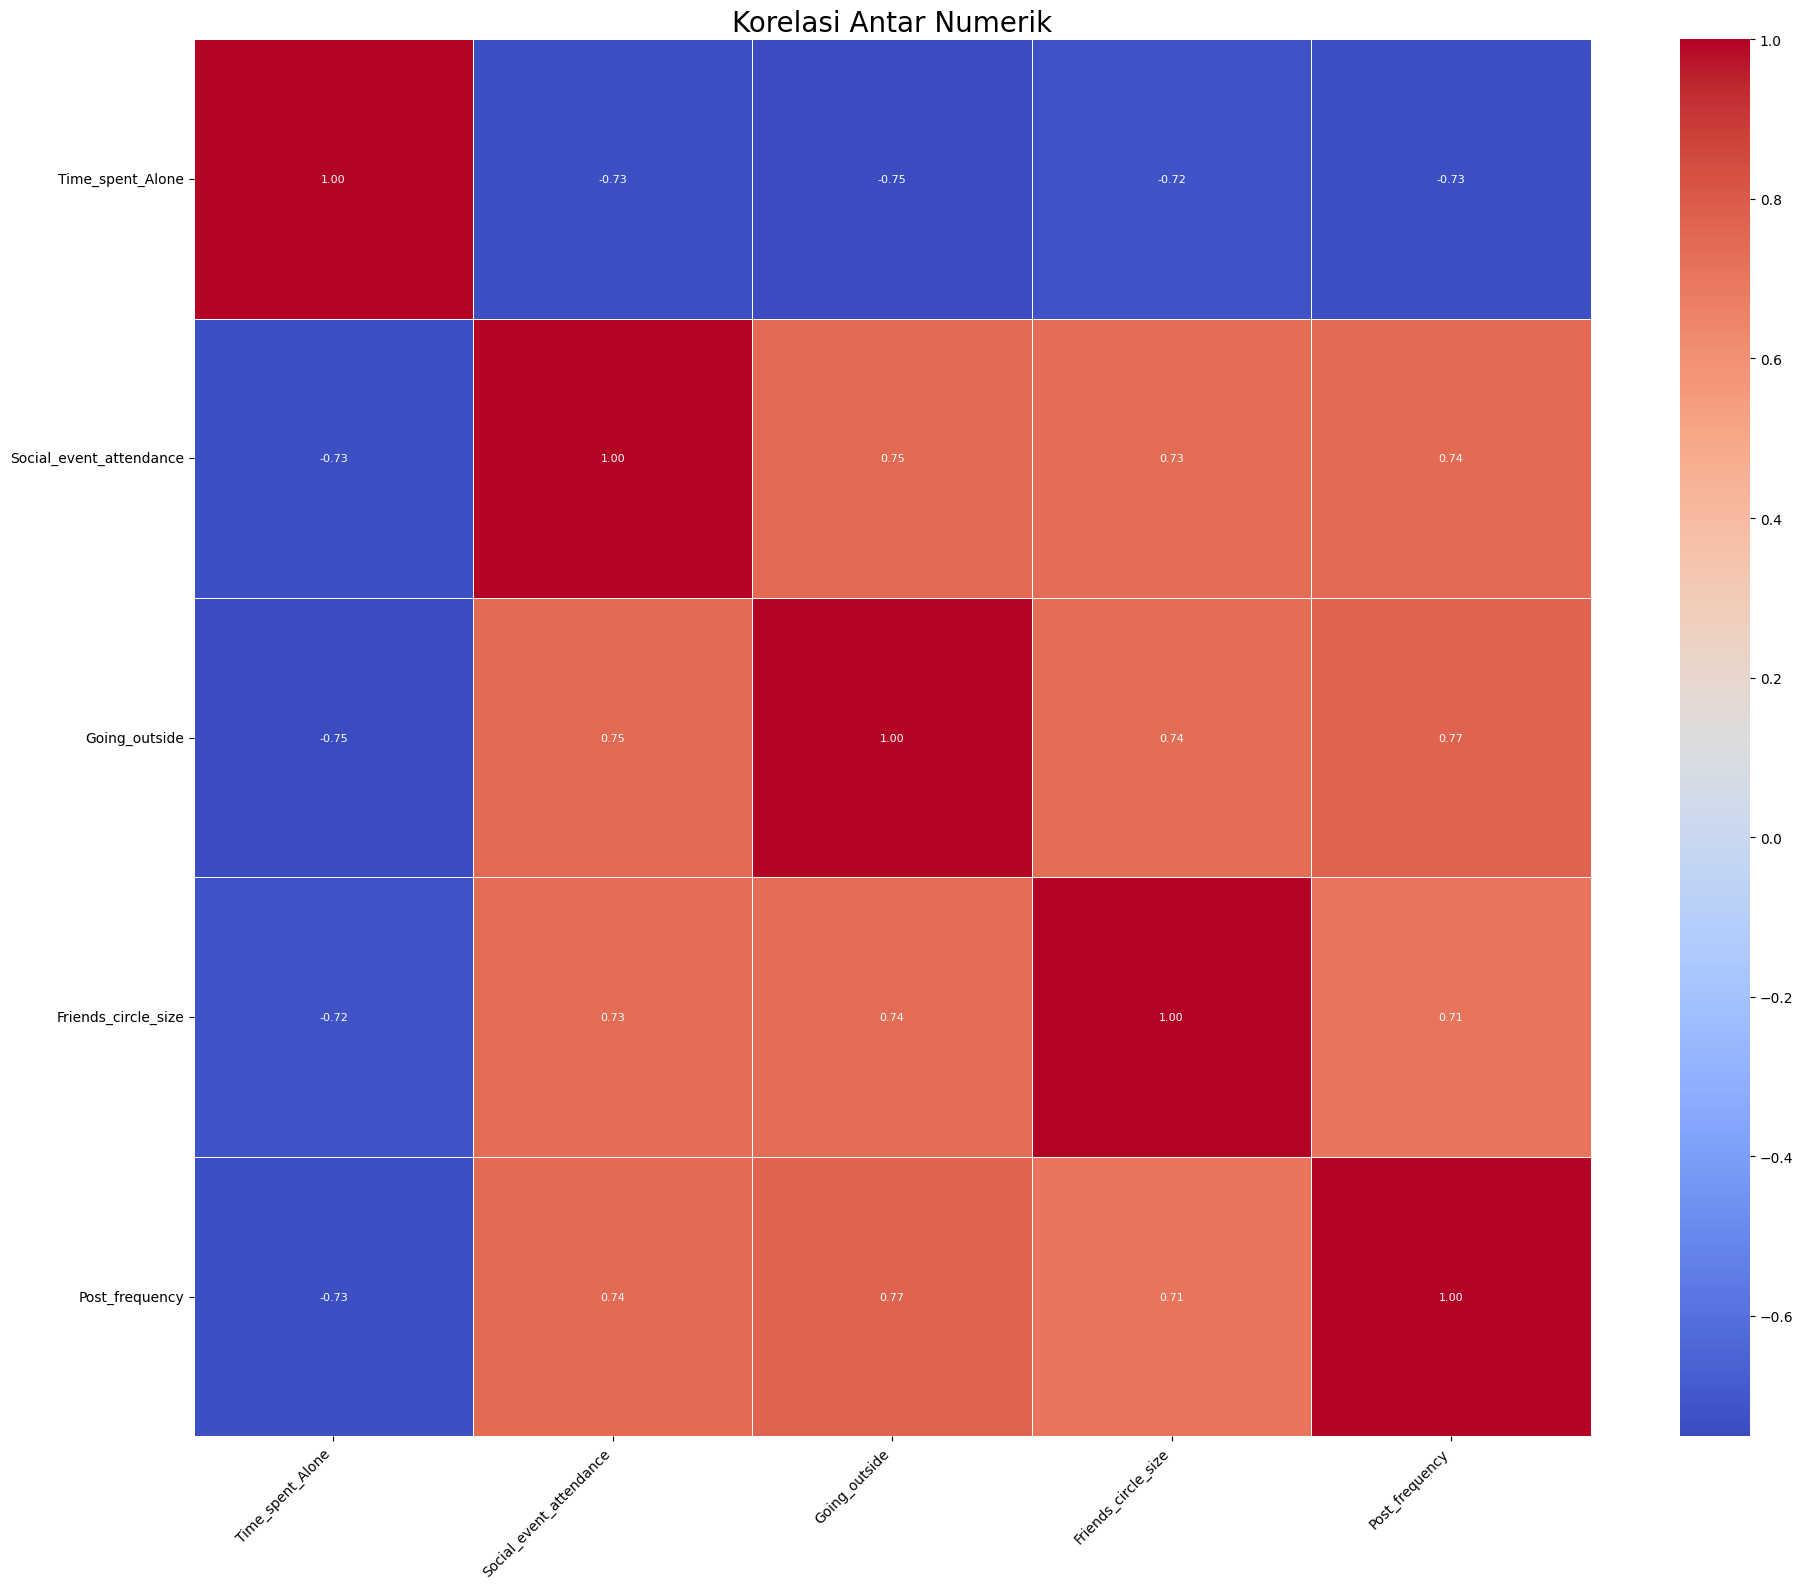

In [12]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap with better readability
plt.figure(figsize=(20, 16))  # Adjust figure size to fit the labels better
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True,
            square=True, annot_kws={'size': 8}, linewidths=0.5)  # Decrease font size for annotations

# Adjust the labels to prevent overlap
plt.title('Korelasi Antar Numerik', size=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate column labels and adjust font size
plt.yticks(rotation=0, fontsize=10)  # Keep row labels horizontal and adjust font size

# Tighten layout to ensure labels don't get cut off
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
# Menghapus kolom yang tidak berpengaruh
df_selection = df.drop(columns="Time_spent_Alone")

In [14]:
df_selection = df_selection.dropna()

In [15]:
df_selection = df_selection.drop_duplicates()

In [16]:
X = df_selection.drop(columns='Personality')
y = df_selection['Personality']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih: 1066
Jumlah data uji: 267


In [28]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for training and test data
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now we can safely convert X_train_dummies and y_train into integers
X_train_dummies = pd.get_dummies(X_train, drop_first=True).astype('object')
X_train_dummies = X_train_dummies.astype('int')

X_test_dummies = pd.get_dummies(X_test, drop_first=True).astype('object')
X_test_dummies = X_test_dummies.astype('int')

print(f'Jumlah data setelah encoding: {y_train.shape[0]}')


Jumlah data setelah encoding: 1066


In [29]:
X_train_dummies

,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes
469,0,1,4,2,1,1
1313,8,5,14,7,0,0
581,9,7,7,8,0,0
2609,8,6,5,5,0,0
2455,6,6,13,6,0,0
...,...,...,...,...,...,...
2565,5,3,5,5,0,0
2303,8,4,10,3,0,0
119,8,4,12,4,0,0
1952,5,4,10,5,0,0


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummies)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test_dummies)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [31]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print the number of samples before and after SMOTE
print(f'Jumlah data latih sebelum SMOTE: {len(X_train_scaled)}')
print(f'Jumlah data latih setelah SMOTE: {len(X_train_resampled)}')

# Convert y_train_resampled to pandas Series to use value_counts
y_train_resampled_series = pd.Series(y_train_resampled)

y_train_resampled_series.value_counts()

Jumlah data latih sebelum SMOTE: 1066
Jumlah data latih setelah SMOTE: 1640


,count
1,820
0,820


In [32]:
X_train_selected = X_train_resampled
X_test_selected = X_test_scaled

# 6. Modelling

In [33]:
# Contoh GridSearchCV untuk RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train_selected, y_train_resampled_series)
best_model = grid_search.best_estimator_
rf_predictions = best_model.predict(X_test_selected)

## 7. Evaluasi Model

In [34]:
# Modified evaluate_model function for multiclass
def evaluate_model(model, y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')  # Changed to 'weighted' for multiclass
    recall = recall_score(y_test, predictions, average='macro')  # Changed to 'weighted' for multiclass
    f1 = f1_score(y_test, predictions, average='macro')  # Changed to 'weighted' for multiclass
    evaluation_df = pd.DataFrame({
        'Model': [model],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })
    return evaluation_df


In [35]:

evaluation_df = pd.concat([
    evaluate_model('Random Forest', y_test, rf_predictions)
])
# Displaying the evaluation results
print(evaluation_df)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.831461   0.790274  0.801562  0.795472


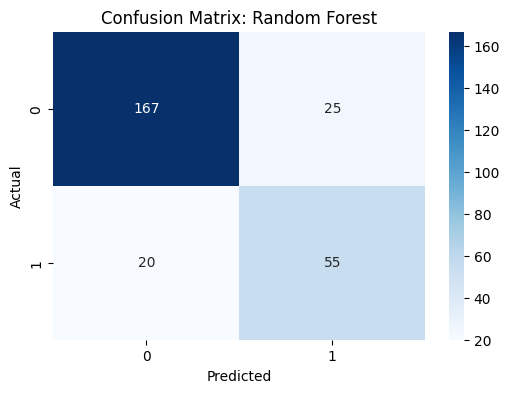

In [36]:
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-37-8fc568ce3200>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


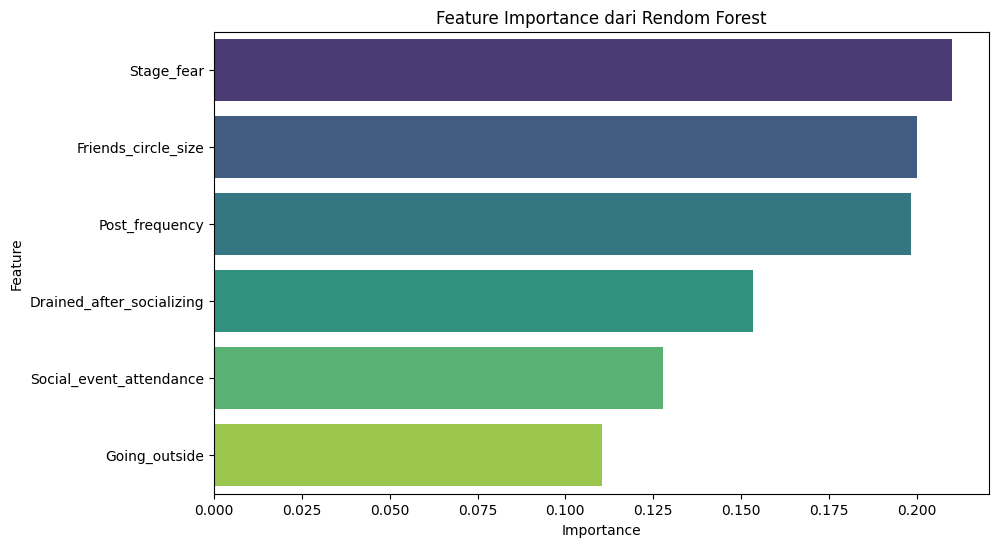

In [37]:
feature_importances = best_model.feature_importances_

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance dari Rendom Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 8. Inference

In [38]:
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [43]:

# === Load Model & LabelEncoder ===
best_model = joblib.load("best_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# === Kolom yang digunakan saat training (urutan WAJIB sama) ===
columns_trained = [

    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
]

# === Data Baru untuk Prediksi ===
new_data = pd.DataFrame([{
    'Stage_fear': 'Yes',
    'Social_event_attendance': 3.0,
    'Going_outside': 2.0,
    'Drained_after_socializing': 'No',
    'Friends_circle_size': 6.0,
    'Post_frequency': 4.0
}])

# === Konversi kolom kategorikal ke numerik ===
# Asumsi: saat training, 'Yes' = 1, 'No' = 0
new_data['Stage_fear'] = new_data['Stage_fear'].map({'Yes': 1, 'No': 0})
new_data['Drained_after_socializing'] = new_data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# === Susun ulang kolom agar sesuai dengan saat training ===
new_data = new_data[columns_trained]

# === Lakukan Prediksi ===
predicted = best_model.predict(new_data)
predicted_label = label_encoder.inverse_transform(predicted)
print("Prediksi Kepribadian:", predicted_label[0])

# === Simpan hasil prediksi ke CSV ===
def export_predictions_to_csv(data, predictions, filename="personality_prediction.csv"):
    df_export = data.copy()
    df_export['Predicted_Personality'] = predictions
    df_export.to_csv(filename, index=False)
    print(f"Hasil prediksi disimpan di {filename}")

export_predictions_to_csv(new_data, predicted_label)

Prediksi Kepribadian: Introvert
Hasil prediksi disimpan di personality_prediction.csv
